# **RNN TENSORFLOW**

In [ ]:
#importamos las liberías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import MinMaxScaler

     Month  Passengers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121


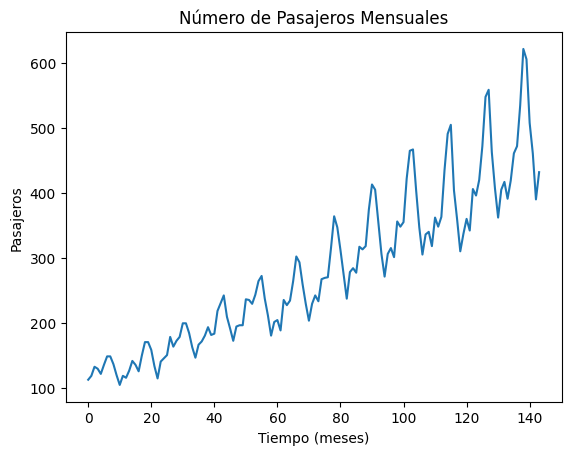

In [ ]:
#Carga y visualizacion de datos
# Dataset mensual de pasajeros (año 1949-1960)
data = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv")

# Visualizar los primeros registros
print(data.head())

# Graficar los datos
plt.plot(data['Passengers'])
plt.title("Número de Pasajeros Mensuales")
plt.xlabel("Tiempo (meses)")
plt.ylabel("Pasajeros")
plt.show()

In [ ]:
#Preparación de datos
# Normalizar los datos entre 0 y 1
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data['Passengers'].values.reshape(-1, 1))

# Definir la longitud de las secuencias (por ejemplo, 12 meses)
seq_length = 12
X, y = [], []

# Crear secuencias y etiquetas
for i in range(len(normalized_data) - seq_length):
    X.append(normalized_data[i:i + seq_length])  # Secuencia de entrada
    y.append(normalized_data[i + seq_length])   # Siguiente valor a predecir

# Convertir a arrays numpy
X, y = np.array(X), np.array(y)

# Dividir en conjunto de entrenamiento y validación
train_size = int(len(X) * 0.8)
X_train, X_val = X[:train_size], X[train_size:]
y_train, y_val = y[:train_size], y[train_size:]

# Confirmar las dimensiones
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_val: {X_val.shape}, y_val: {y_val.shape}")

X_train: (105, 12, 1), y_train: (105, 1)
X_val: (27, 12, 1), y_val: (27, 1)


**Construcción del modelo**

In [ ]:
# Construir el modelo
model = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(seq_length, 1)),  # 50 neuronas
    Dense(1)  # Salida de una sola dimensión (el valor predecido)
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mse')

# Resumen del modelo
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 50)                  │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

Explicación:

1.- SimpleRNN:
* 50 neuronas con función de activación tanh.
* input_shape define la longitud de las secuencias y características (1 porque solo usamos pasajeros).

2.- Dense(1): Produce un único valor como salida, que será el número de pasajeros.

3.- Compilación:
* adam: Optimizador eficiente.
* mse: Error cuadrático medio, ideal para regresión.

**Entrenamiento del Modelo**

In [ ]:
# Entrenamiento del modelo
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,  # Número de ciclos
    batch_size=16,  # Tamaño de lotes
    verbose=1
)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0278 - val_loss: 0.0257
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0078 - val_loss: 0.0091
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0028 - val_loss: 0.0071
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0024 - val_loss: 0.0127
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0021 - val_loss: 0.0055
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0016 - val_loss: 0.0124
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0015 - val_loss: 0.0062
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0015 - val_loss: 0.0097
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0014 - val_loss: 0.0074
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0012 - val_loss: 0.0101
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0012 - val_loss: 0.0064
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0011 - val_loss: 0.0098
Epoch 

**Evualuación del Modelo**

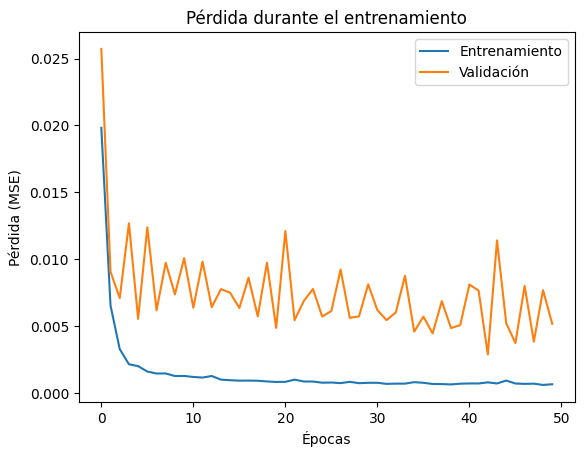

In [ ]:
# Graficar pérdidas
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title("Pérdida durante el entrenamiento")
plt.xlabel("Épocas")
plt.ylabel("Pérdida (MSE)")
plt.legend()
plt.show()


**Predicciones**

In [ ]:
# Predecir valores futuros (usando el último conjunto de datos como entrada)
last_sequence = X_val[-1]  # Última secuencia de validación
predictions = []

for _ in range(40):  # Predecir los próximos 12 meses
    pred = model.predict(last_sequence[np.newaxis, :, :])[0, 0]
    predictions.append(pred)
    # Actualizar la secuencia
    last_sequence = np.append(last_sequence[1:], [[pred]], axis=0)

# Desnormalizar los datos predichos
predicted_values = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Graficar resultados
plt.plot(data['Passengers'].values, label="Datos Reales")
plt.plot(range(len(data['Passengers']), len(data['Passengers']) + 12), predicted_values, label="Predicciones", color='orange')
plt.title("Predicción de Pasajeros con RNN")
plt.xlabel("Meses")
plt.ylabel("Pasajeros")
plt.legend()
plt.show()

NameError: name 'X_val' is not defined

# **RNN CON PYTORCH**

**¿Qué es una RNN basada en LSTM?**
Las LSTM son una mejora de las RNN simples diseñadas para resolver problemas como el desvanecimiento del gradiente, lo que les permite recordar información durante períodos más largos. Esto es crucial en tareas de series temporales complejas.

**Componentes principales de una LSTM**
1.- Célula de Memoria: Almacena información a largo plazo.
2.- Puertas:
  * Puerta de entrada: Decide qué información agregar a la memoria.
  * Puerta de olvido: Decide qué información descartar.
  * Puerta de salida: Decide qué información enviar al siguiente paso.

In [ ]:
#Importamos librerías
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

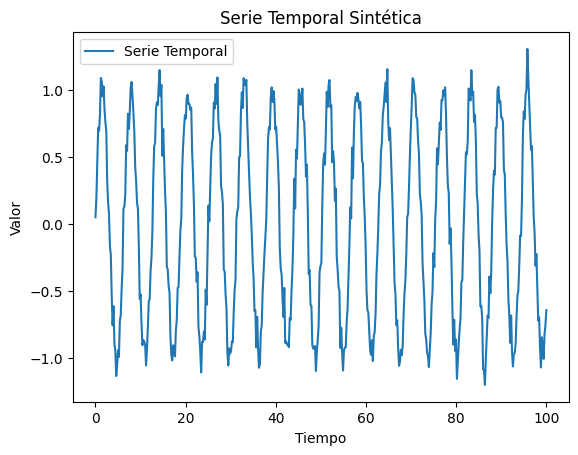

In [ ]:
# Generar una serie temporal senoidal sintetica
np.random.seed(42)  # Para reproducibilidad
time_steps = np.linspace(0, 100, 500)  # 500 puntos
data = np.sin(time_steps) + 0.1 * np.random.normal(size=len(time_steps))  # Seno con ruido

# Visualizar los datos
plt.plot(time_steps, data, label="Serie Temporal")
plt.title("Serie Temporal Sintética")
plt.xlabel("Tiempo")
plt.ylabel("Valor")
plt.legend()
plt.show()

**División de datos**

    1.- Dividmos en secuencias
    2.- Normalizamos con min-max

In [ ]:
# Normalizar los datos
scaler = MinMaxScaler(feature_range=(-1, 1))
data_normalized = scaler.fit_transform(data.reshape(-1, 1))

# Crear secuencias de entrada y salida
seq_length = 50  # Longitud de la secuencia
X, y = [], []

for i in range(len(data_normalized) - seq_length):
    X.append(data_normalized[i:i + seq_length])  # Secuencia de entrada
    y.append(data_normalized[i + seq_length])   # Valor siguiente

X = np.array(X)
y = np.array(y)

# Dividir en conjuntos de entrenamiento y validación
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:], y[train_size:]

# Convertir a tensores de PyTorch
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32)

**Definir la LSTM**

In [ ]:
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTMModel, self).__init__()
        self.hidden_dim = hidden_dim

        # Definir la capa LSTM
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)

        # Capa totalmente conectada para la salida
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Paso hacia adelante a través de la LSTM
        out, _ = self.lstm(x)  # Ignorar el estado oculto
        out = self.fc(out[:, -1, :])  # Usar solo el último paso de tiempo
        return out

**Explicación:**

    1.- Capa LSTM:
      * input_dim: Número de características de entrada (1 en este caso).
      * hidden_dim: Número de neuronas en la capa oculta.
      * num_layers: Número de capas LSTM apiladas.
      
    2.- Capa FC (Fully Connected): Reduce la salida de la LSTM a un valor único.

**Configurar el Modelo, Perdida y Optimizador**

In [ ]:
# Hiperparámetros
input_dim = 1
hidden_dim = 50
num_layers = 2
output_dim = 1
learning_rate = 0.001

# Inicializar el modelo
model = LSTMModel(input_dim, hidden_dim, num_layers, output_dim)

# Definir la función de pérdida y el optimizador
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

**Entrenamiento del Modelo**

In [ ]:
# Configuración del entrenamiento
num_epochs = 70
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    # Entrenamiento
    model.train()
    optimizer.zero_grad()
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    loss.backward()
    optimizer.step()

    # Validación
    model.eval()
    with torch.no_grad():
        y_val_pred = model(X_val)
        val_loss = criterion(y_val_pred, y_val)

    # Guardar las pérdidas
    train_losses.append(loss.item())
    val_losses.append(val_loss.item())

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}")

Epoch 1/70, Loss: 0.3157, Val Loss: 0.3395
Epoch 2/70, Loss: 0.3119, Val Loss: 0.3360
Epoch 3/70, Loss: 0.3083, Val Loss: 0.3325
Epoch 4/70, Loss: 0.3049, Val Loss: 0.3290
Epoch 5/70, Loss: 0.3016, Val Loss: 0.3255
Epoch 6/70, Loss: 0.2982, Val Loss: 0.3217
Epoch 7/70, Loss: 0.2948, Val Loss: 0.3178
Epoch 8/70, Loss: 0.2912, Val Loss: 0.3138
Epoch 9/70, Loss: 0.2875, Val Loss: 0.3095
Epoch 10/70, Loss: 0.2836, Val Loss: 0.3050
Epoch 11/70, Loss: 0.2796, Val Loss: 0.3004
Epoch 12/70, Loss: 0.2755, Val Loss: 0.2957
Epoch 13/70, Loss: 0.2712, Val Loss: 0.2907
Epoch 14/70, Loss: 0.2667, Val Loss: 0.2855
Epoch 15/70, Loss: 0.2620, Val Loss: 0.2801
Epoch 16/70, Loss: 0.2570, Val Loss: 0.2744
Epoch 17/70, Loss: 0.2519, Val Loss: 0.2685
Epoch 18/70, Loss: 0.2464, Val Loss: 0.2622
Epoch 19/70, Loss: 0.2407, Val Loss: 0.2555
Epoch 20/70, Loss: 0.2347, Val Loss: 0.2482
Epoch 21/70, Loss: 0.2282, Val Loss: 0.2404
Epoch 22/70, Loss: 0.2212, Val Loss: 0.2320
Epoch 23/70, Loss: 0.2136, Val Loss: 0.22

**Evaluación del modelo**

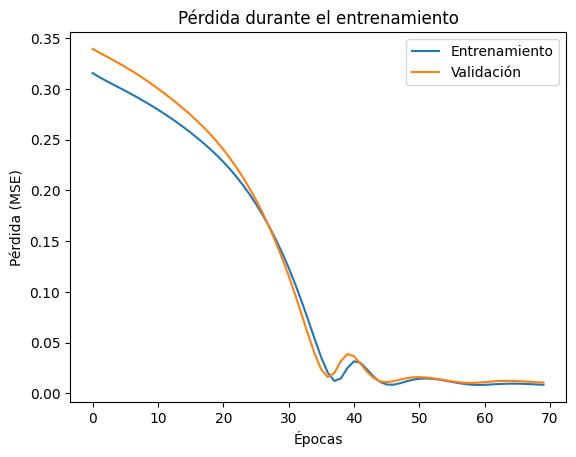

In [ ]:
# Graficar pérdidas
plt.plot(train_losses, label="Entrenamiento")
plt.plot(val_losses, label="Validación")
plt.title("Pérdida durante el entrenamiento")
plt.xlabel("Épocas")
plt.ylabel("Pérdida (MSE)")
plt.legend()
plt.show()

**Evaluación**

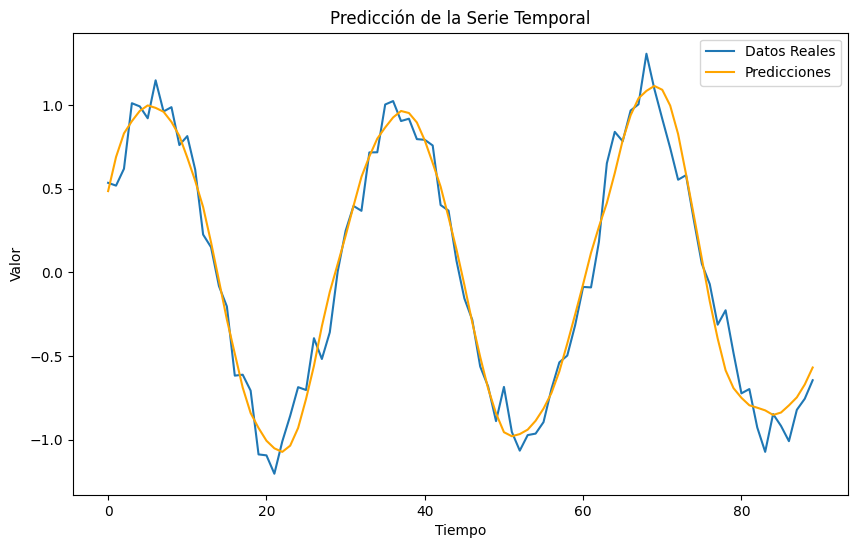

In [ ]:
# Predecir sobre el conjunto de validación
model.eval()
with torch.no_grad():
    predictions = model(X_val).numpy()

# Desnormalizar
predicted = scaler.inverse_transform(predictions)
actual = scaler.inverse_transform(y_val.numpy())

# Graficar resultados
plt.figure(figsize=(10, 6))
plt.plot(actual, label="Datos Reales")
plt.plot(predicted, label="Predicciones", color='orange')
plt.title("Predicción de la Serie Temporal")
plt.xlabel("Tiempo")
plt.ylabel("Valor")
plt.legend()
plt.show()